<h1 align="center">Actividad 1: Agrupar datos con algoritmos de Clustering en Python</h3>

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<h2> Preámbulo</h2>
<p> Esta activad se inspira de ejercicios disponibles en los recursos siguientes:<p>
<ul>
<li> Guías y código Python de <a href="http://brandonrose.org/">Brandon Rose</li>
<li>Curso de <a href="https://www.datacamp.com/courses/unsupervised-learning-in-python">DataCamp</a> y código disponible en la cuenta GitHub de <a href="https://github.com/benjaminwilson/python-clustering-exercises">Benjamin Wilson</a></li>
</ul>
<p> La actividad requiere el uso de Python 3.x y <a href="http://jupyter.org/install">Jupyter Notebook</a>. El código entregado fue probado con Python 3.6.1. Para saber cuál versión de Python usted está utilizando, ejecutar la celda siguiente (está información es importante cuando se necesitará instalar nuevos paquetes.</p>
</div>

In [1]:
!python -V

Python 3.6.4 :: Anaconda custom (64-bit)


<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<h2>Objetivos de la actividad</h2>
<p>El <b>objetivo general</b> de esta actividad consiste en saber explorar la estructura oculta de un dataset, implementando una metodología de agrupamiento de datos clásico, utilizando unos algoritmos de clustering estándares (K-means, Ward clustering, DBSCAN) sobre datos estructurados y no estructurados y describiendo sus principales características.</p>  

<p> Un <i>objetivo secundario</i> consiste en programar con algunas librerías Python para analizar y visualizar datos (<a href="https://pandas.pydata.org/">Pandas</a>, Sci-Kit learn, Matplotlib, etc.)</p>
</div>

<h2>0. Antes de empezar: unas palabras sobre las herramientas de Python para la Ciencia de los Datos...</h2>

<img src="python-packages.png"></img>

<p>Cada toolkit de Python tiene sus propios objetivos:</p>
<ul>
     <li><b>Numpy</b> agrega funcionalidades en Python para soportar arreglos y matrices de gran tamaño y funciones matemáticas para manipularlas.</li>
     <li><b>SciPy</b> es una colección de algoritmos matemáticos y funciones programadas con NumPy. Agrega funciones y clases de alto nivel para facilitar la manipulación y visualización de datos.</li>
      <li><b>Pandas</b> ofrece estructuras de datos y operaciones para manipular y analizar matrices de datos numéricos y series de tiempo.</li>
    <li><b>Scikit-learn</b> es una librería Python para el Machine Learning, contiene una implementación de los principales algoritmos estandares para el aprendizaje supervisado y no supervisado.</li>
</ul>

<p> En la versión actual de Scikit-lean, se puede encontrar en particular los algoritmos de clustering siguiente:</p>
<img src="clustering-algorithm.png"></img>


<h2>1. Ejercicio 1: descubrir K-means sobre datos estructurados bi-dimensionales</h2>

<p>El primer dataset que queremos explorar consiste en un archivo CSV donde se encuentra un conjunto 300 observaciones (o instancias) descritas por 2 características numéricas. 
<br>Ejemplo:<i>1.70993371252,0.698852527208</i></p>
<ul><li>La primera etapa consiste en cargar los datos en un objeto <i>DataFrame</i>. Un DataFrame es una de las estructuras de datos provistas por Pandas para representar los datos, consiste en una matriz en dos dimensiones (ver <a href="https://pandas.pydata.org/pandas-docs/stable/dsintro.html">más detalles</a>) donde cada fila es un dato y cada columna una característica sobre los datos.</li></ul>

In [4]:
import pandas as pd
dataframe = pd.read_csv('datasets/dataset1.csv')#TODO
#mostrar la dataframe
#dataframe

<ul><li>Para tener una primera comprensión de nuestros datos, queremos visualizarlos en un <i><a href="https://en.wikipedia.org/wiki/Scatter_plot">Scatter plot</a></i>, a través la librería Matplotlib:</li></ul>

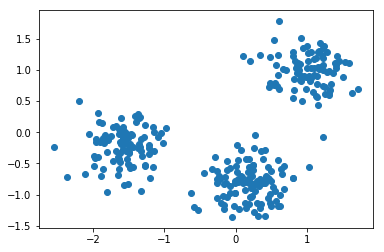

In [5]:
import matplotlib.pyplot as plt

#Crear un arreglo 'coordinates_x' que contiene los valores de la columna 0 de nuestro dataframe
coordinates_x = dataframe.values[:,0]
#lo mismo con los valores de la columna 1 del dataframe
coordinates_y = dataframe.values[:,1]

#Crear y mostrar el scatter plot pasando las coordinadas como parametros de la función plt.scatter().
plt.scatter(coordinates_x, coordinates_y)
plt.show()

<p> Como pueden verlo, nuestro dataset tiene una estructura bastante simple y explicita, aparecen 3 grupos de datos (o <i>clústers</i>). Sin embargo, este caso es particularmente simple ya que los datos tienen solamente 2 dimensiones y que los clústers están bien separados.

El algoritmo K-means (o algoritmo de Lloyd) es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. El problema es computacionalmente difícil (NP-hard). Sin embargo, hay eficientes heurísticas que se emplean comúnmente y convergen rápidamente a un óptimo local (ver <a href="https://en.wikipedia.org/wiki/K-means_clustering">más detalles</a>).
<ul><li>La librería SciKit-learn de Python ofrece una implementación de este algoritmo, que se puede utilizar con la API siguiente:</li></ul>

In [8]:
from sklearn.cluster import KMeans
#Declaración de un modelo de clustering especificando el número a priori de clusters que queremos encontrar. 
##En este caso, hemos elegido por casualidad n_clusters=5.
modelKmeans = KMeans(n_clusters=3)#TODO
#Entrenamiento del modelo de clustering con los datos de nuestro dataframe
modelKmeans.fit(dataframe.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<div style="border: 2px solid #000000;">
<b>Preguntas:</b>
<ol>
<li> ¿Cuáles son las etapas del algoritmo de Lloyd?</li>
<li> ¿Por qué es necesario initializar varias veces el algoritmo? De qué sirve el parametro n_init?</li>
<li> ¿Cómo elegir el número de inicializaciones e iteraciones? (n_init y max_iter)</li>
</ol>
</div>

<ul>
<li>Ahora queremos visualizar cómo el algoritmo agrupó los datos en 5 grupos:
</ul>


## Respuestas:

1. El algoritmo Lloyd, tambien conocido como algoritmo de kmeans, corresponde a agrupar conjuntos de datos según su ceracania al centroido k (aleatorio). Se ralizan varias iteraciones del algoritmo hasta estimar que los gurpos ya no cambian.

2. n_init corresponde al numero de veces que el algoritmo se debe correr con diferentes centroides, el algoritmo se debe iterar para encontrar los grupos que mejor describan los datos.

3. El criterio para establecer estos parametros es complicado, por lo general se eligen valores aleatorios.

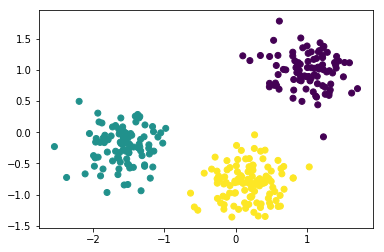

In [9]:
#Crear un arreglo de datos donde cada valor corresponde a la decision del modelo K-Means a la pregunta siguiente:
##¿A qué clúster pertenece el dato corriente de la dataframe?
labels = modelKmeans.predict(dataframe.values)
#print(labels)

#Crear un Scatter Plot donde cada punto tiene un color asociado a un grupo
plt.scatter(dataframe.values[:,0], dataframe.values[:,1], c=labels)
plt.show()

<ul><li>Se puede utilizar el mismo modelo para clasificar nuevos datos. NB: Sin embargo, si el objetivo aplicativo consiste en clasificar datos según ciertas categorías es recomendable seguir una metodología de aprendizaje supervisado.</li></ul>

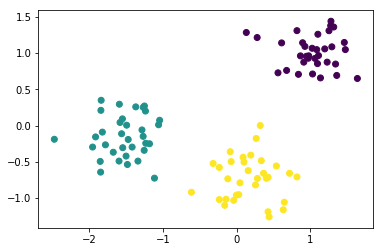

In [11]:
#Cargar un dataset con nuevos datos
dataframe2 = pd.read_csv('datasets/dataset2.csv') #TODO

#Utilizar el modelo K-Means anterior para clasificar los nuevos datos
labels2 = modelKmeans.predict(dataframe2.values)

#Visualizar el resultado de la predicción en un Scatter Plot
plt.scatter(dataframe2.values[:,0], dataframe2.values[:,1], c=labels2)
plt.show()

<div style="border: 2px solid #000000;">
<b>Preguntas:</b>
<ol>
<li> ¿Cómo el algoritmo de Lloyd/K-means permitió predecir la clase de los nuevos datos?</li>
<li> ¿Cómo se podría definir el concepto de <i>'centroid'</i>?</li>
<li> ¿Cuáles son los limites del método que utiliza K-means para calcular los <i>'centroid'</i>?</li>
</ol>
</div>

<ul><li>Visualizemos los <i>centroids</i> de cada clúster:</li></ul>

## Respuestas:

1. Permite establecer grupos segun la cercania que tienen los datos a cada uno de los centroides.

2. Los centroides son puntos escogidos aleatoriamente al inicio, luego se van ajustando para describir de mejor manera los grupos encontrados.

3. Los centroides son escogidos aleatorios al incio, por lo que pueden caer en cualquier lugar y cada vez que se ejecuta el algoritmo cae en un lugar distinto.

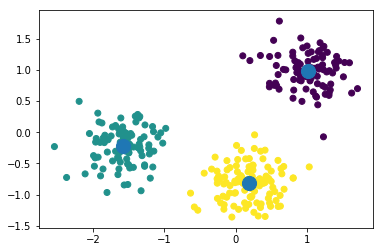

In [12]:
#en el API del modelo k-means existe un metodo permitiendo de obtener un arreglo de datos correspondiendo a los centroids 
centroids = modelKmeans.cluster_centers_

#Dibujamos el Scatter Plot de la dataframe inicial ...
plt.scatter(dataframe.values[:,0], dataframe.values[:,1], c=labels) #TODO
#...y agregamos los centroids en el mismo plot
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200)
plt.show()

<ul><li>La distancia con el centroid permite clasificar los nuevos datos:</li></ul>

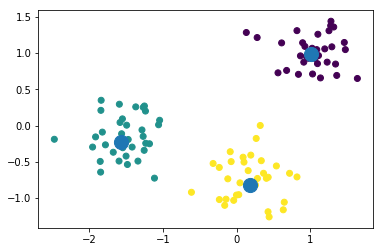

In [13]:
#nuevos datos de la dataframe2
plt.scatter(dataframe2.values[:,0], dataframe2.values[:,1], c=labels2)
#mismos centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200)#TODO
plt.show()

<div style="border: 2px solid #000000;">
<b>Preguntas:</b>
<ol>
<li> ¿Existe un número de clúster mejor que los otros para buscar la estructura oculta de los datos?</li>
<li> ¿Cómo determinar cuál es el mejor número de clúster?</li>
</ol>
</div>

## Respuestas:

1. Si, existe, al observar la gráfica se puede derminar que son 3 los grupos a encontrar.

2. Se puede observar la gráfica de los datos y determinar la cantidad de grupos, o se puede observar la desaceleracion de la curva al iterar con distintos valores de k.

<p>Existen varios métodos estadísticos para determinar el mejor número de clústers tales como los métodos <i>Elbow</i>, <i>Average Silhouette</i> y <i>Gap Statistics</i> (ver <a href="http://www.sthda.com/english/wiki/print.php?id=239#three-popular-methods-for-determining-the-optimal-number-of-clusters">detalles</a>). En la API de la librería SciKit-Learn también existe un método llamado <i>inertia</i> que permite estimar el mejor número k:</p>

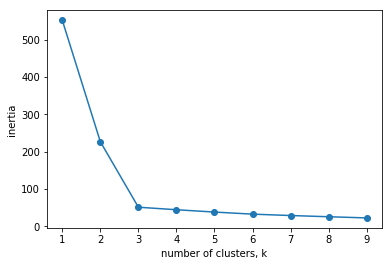

In [14]:
from sklearn.cluster import KMeans

num_k = range(1, 10) #TODO
inertias = []

for k in num_k:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(dataframe)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

    import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()


<div style="border: 2px solid #000000;">
<b>Preguntas:</b>
<ol>
<li> ¿A qué método para buscar el mejor número de clústers corresponde el método <i>inertia</i> de Sci-Kit?</li>
<li> ¿Cuáles son las principales <b>ventajas</b> del algoritmo K-means?</li>
<li> ¿Cuáles son las principales <b>limites</b> del algoritmo K-means?</li>
</ol>
</div>

## Respuestas:

1. Corresponde a Elbow.

2. Es relativamente facil y rapido de implementar, además, es posible establecer el número de grupos sin saber nada a priori.

3. Se pueden observar que los centroides escogidos al inicio, los que pueden cambiar mucho el resultado dependiendo de donde caigan, esto se puede solucionar utilizando el algoritmo de kmean+, otra limitación es que a priori no se conoce los grupos, lo que tambien es una ventaja para entender el problema.

<h2>2. Ejercicio 2: Descubrir los algoritmos de clustering jerárquico sobre datos estructurados multi-dimensionales</h2>

<div>
<div style="float:left;width:45%;" >
    <p>En este segundo ejercicio, queremos explorar otra familia de algoritmos de clustering basada sobre la idea que en ciertos casos los datos pueden tener <b>relaciones jerarquícas</b> ocultas. El Algoritmo de Ward es parte de este grupo de algoritmos.</p>

<p> Supongamos que trabajamos por una empresa de ingeniería genética que quiere entender las evoluciones en las especies de semillas de grano. Tenemos a nuestra disposición el dataset 'semillas-trigo.csv'.</p>
</div>

<div style="float:right;width:45%;">
    <img src="images/trigo.jpeg"></img>
</div>
<div style="clear:both; font-size:1px;"></div>
</div>

<ul>
<li>Cargar los datos en un DataFrame:</li>
</ul>

In [15]:
import pandas as pd

seeds_df = pd.read_csv('datasets/semillas-trigo.csv')

# Suprimir la columna 'grain_variety' del dataset. Utilizaremos esta información solamente como referencia al final
varieties = list(seeds_df.pop('grain_variety'))

# Extraer los datos como un arreglo NumPy
samples = seeds_df.values

# Mostrar el DataFrame
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533


<p>En SciPy, el método <i>linkage()</i> permite hacer clustering jerárquico o aglomerativo. Ver más detalles: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage">linkage()</a> </p>

<p> El clustering jerárquico consiste en calcular una distancia entre clusters. Los métodos más simples consisten en calcular una distancia entre 2 puntos referencias de cada clúster:  Nearest Point Algorithm (o 'single' en SciPy), Farthest Point Algorithm (or Voor Hees Algorithm o 'complete' en SciPy), UPGMA (o 'average' en Scipy), centroids. El <b>método Ward</b> se diferencia de las otras utilizando un algoritmo recursivo para encontrar un agrupamiento que minimiza la varianza en las distancias entre clústers.

<ul>
<li>Probar el método de clustering jerárquico con el método Ward y visualizar el resuldado con un Dendograma:</li>
</ul>

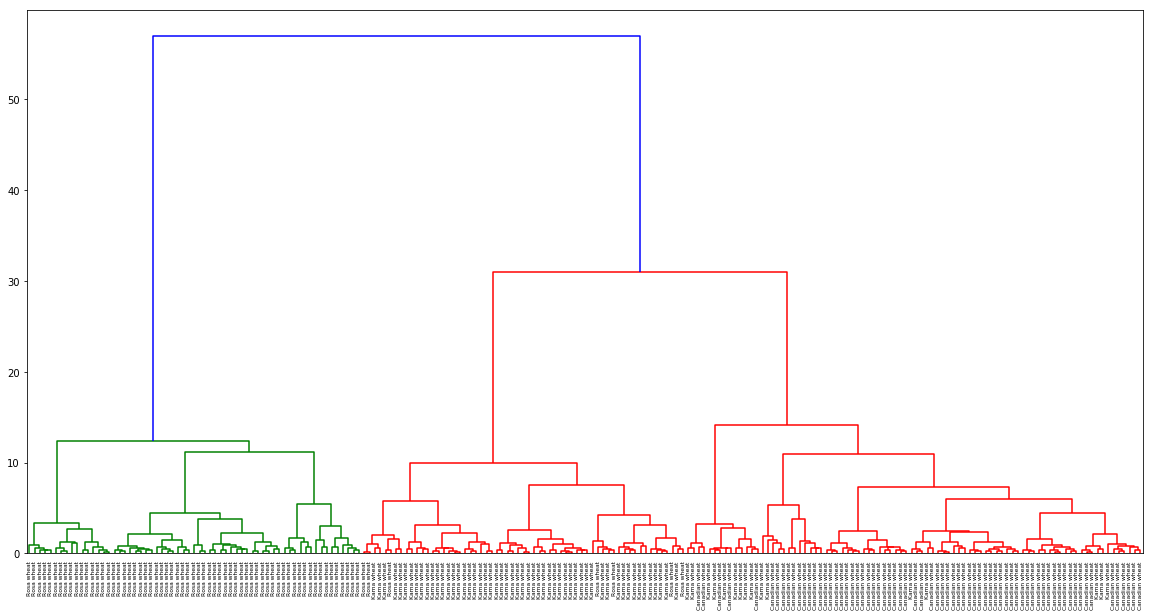

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(samples, method='ward') #TODO

plt.figure(figsize=(20,10))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6, 
)
plt.show()

<ul>
<li>Probar el método de clustering jerárquico con el método Ward y visualizar el resuldado con un Dendograma:</li>
</ul>

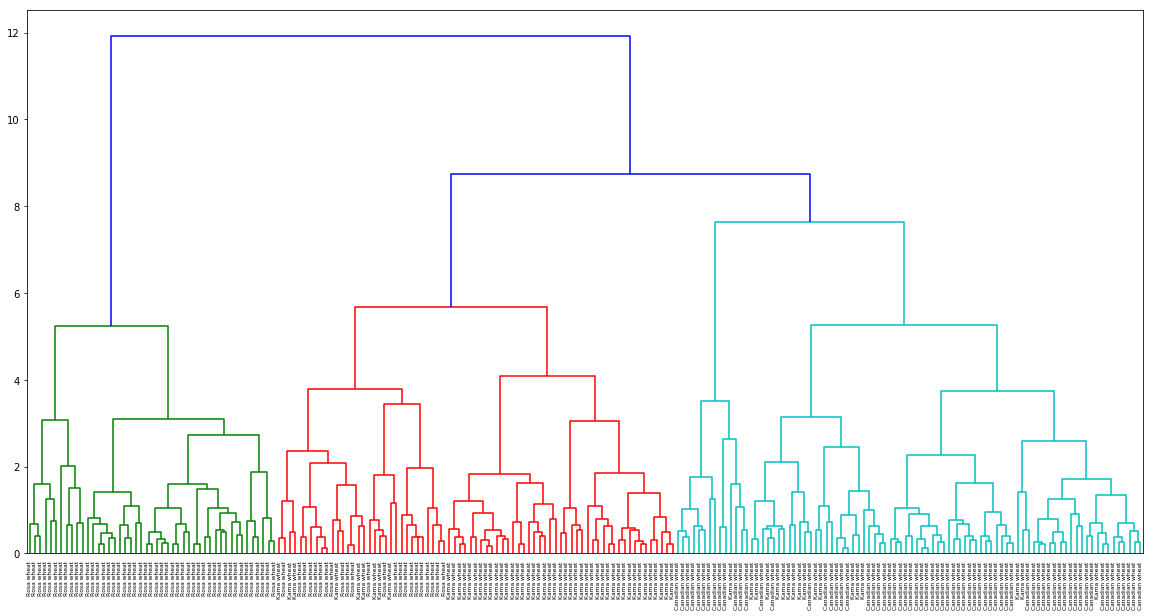

In [17]:
mergings2 = linkage(samples, method='complete')

plt.figure(figsize=(20,10))

dendrogram(mergings2,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6, #TODO
)
plt.show()

<h2>3. Ejercicio 3: Distance-based clustering vs. Density-based clustering</h2>

<ul>
<li> En este ejercicio queremos explorar los datos del dataset3.csv y hemos elegido utilizar el algoritmo K-Means.
<li> Cargar los datos:</li>
</ul>

In [18]:
#Cargar los datos:
import pandas as pd
dataframe3 = pd.read_csv('datasets/dataset3.csv')#TODO #TODO
#Encontrar el mejor número de cluser

<ul>
<li> Encontrar cuál es el mejor número de clusters:
</ul>

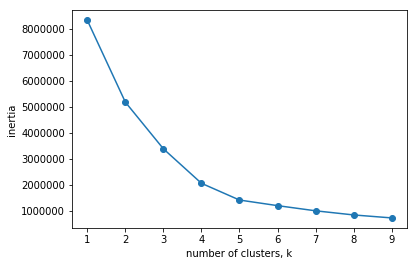

In [19]:
from sklearn.cluster import KMeans

#Prueba por k entre 1 y 10
num_k = range(1, 10)
inertias = []

for k in num_k:
    model = KMeans(n_clusters = k) #TODO
    model.fit(dataframe3) #TODO
    inertias.append(model.inertia_)

import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()

<ul>
<li> ¡El mejor número K parece ser 5! Clusterizemos con k=5 y visualizemos el resultado!
</ul>

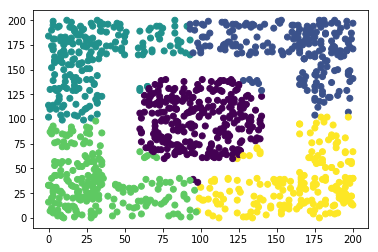

In [20]:
from sklearn.cluster import KMeans

modelKmeans = KMeans(n_clusters=5) #TODO
modelKmeans.fit(dataframe3) #TODO
labels = modelKmeans.predict(dataframe3.values)

plt.scatter(dataframe3.values[:,0], dataframe3.values[:,1], c=labels)
plt.show()

<ul>
<li> ¿Cuál es su opinión sobre el análisis?</li>
<li> Probemos con el algoritmo DBSCAN:
</ul>


In [21]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

Counter({0: 111, 1: 94, 2: 93, -1: 2})


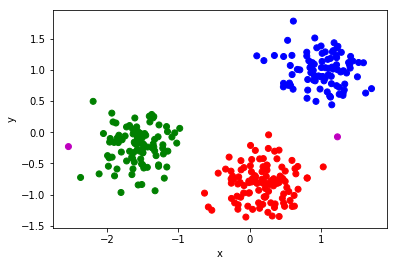

In [22]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
dataframe1 = pd.read_csv('datasets/dataset1.csv')

# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.4, min_samples=5)
#dataframe1.values = df_circ[["x", "y"]]
estimator.fit(dataframe1)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(dataframe1.values[:,0], dataframe1.values[:,1], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 800, 0: 300})


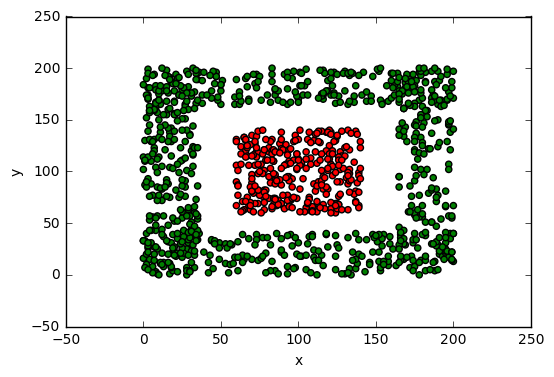

In [64]:
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
dataframe3 = pd.read_csv('datasets/dataset3.csv')

# Fit a DBSCAN estimator
estimator = DBSCAN(eps=15, min_samples=5) #TODO
#dataframe3.values = df_circ[["x", "y"]]
estimator.fit(dataframe3)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(dataframe3.values[:,0], dataframe3.values[:,1], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<div style="border: 2px solid #000000;">
<b>Preguntas:</b>
<ol>
<li> ¿De qué sirven los parametros epsilon y min_sample en DBSCAN?</li> 
</ol>
</div>

## Respuesta:

1. epsilo es el la distancia minima para formar un grupo y min_sample es la cantidad minima para formar un grupo.

<h2>4. Ejercicio 4: ¿Cómo agrupar datos no estructurados multi-dimensionales?</h2>

<p>En el último ejercicio, vamos a explorar el agrupamiento de datos textuales con el algoritmo de Ward.
En general, los algoritmos K-Means, Ward o DBSCAN son limitados para agrupar datos textuales, y es preferible utilizar otro protocolo no supervisado como Latent Dirichlet Allocation (LDA). Sin embargo este ejercicio nos servirá en particular para empezar a utilizar la librería NLTK y revisar algunos preprocesamientos sobre datos textuales.</p>

<ul>
<li>Tenemos a nuestra disposición un dataset con 58 discursos políticos de los presidentes de Estados-Unidos. Cada uno corresponde al primer discurso que hace el presidente cuando entre en la Casa Blanca. Cargar el dataset 'speeches.csv':</li>
</ul>

In [23]:
import pandas as pd
import re
import nltk

#Cargar el dataset de speeches
df_speeches = pd.read_csv('datasets/speeches.csv')

<ul>
<li>SciKit-Learn viene con un API por defecto para transformar un dataset de textos brutos en una matrice donde cada texto es una representación vectorial del peso TFIDF de cada palabra.
</ul>

<img src="images/tfidf.png"></img>

<ul>
<li>Transformar el dataset de textos en un matrice de pesos TFIDF:</li>
</ul>

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_speeches.values[:,4])

<ul>
<li>Calcular la distancia entre cada documento:</li>
</ul>

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

<ul>
<li>Agrupar los documentos con el algoritmo de Ward y la distancia entre documentos, y visualizar el resultado con un dendograma:</li>
</ul>

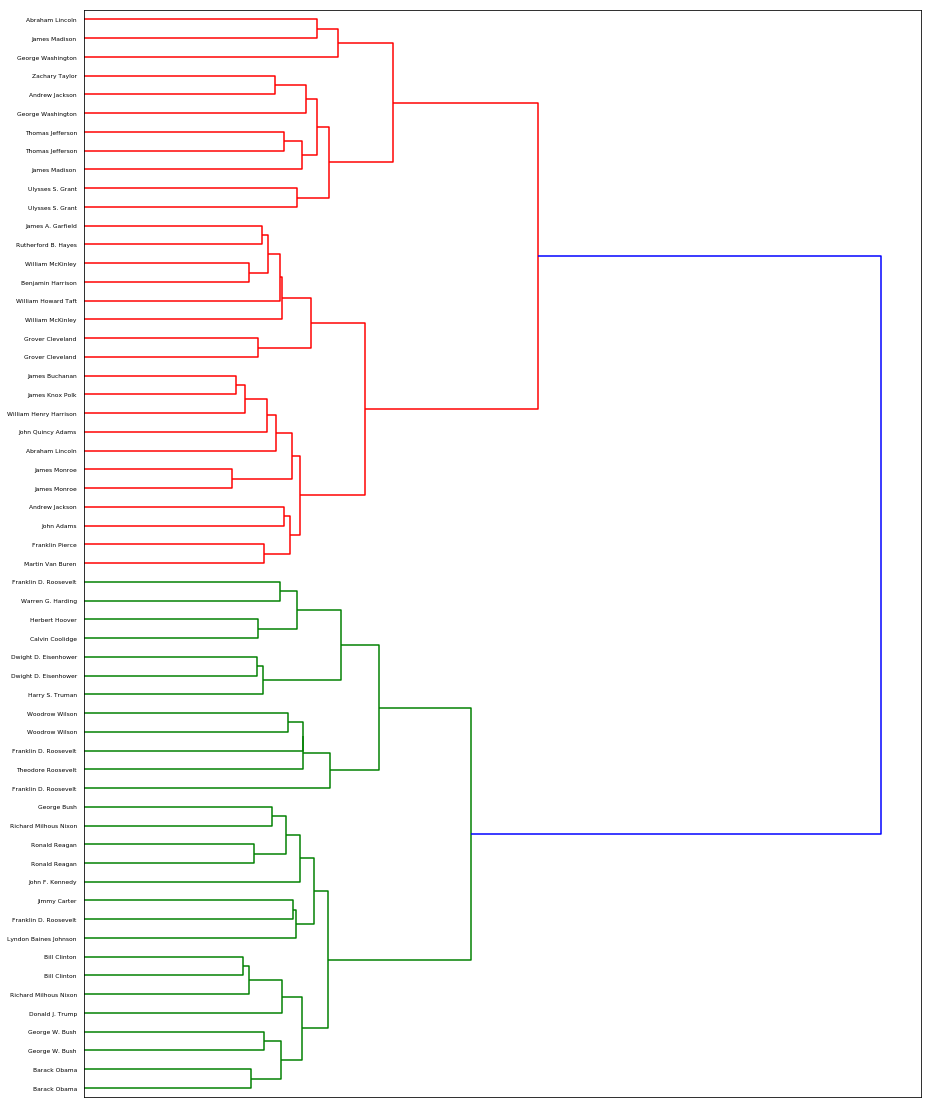

In [27]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=df_speeches.values[:,1]);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

#plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.show()

<ul>
<li>Hacer lo mismo pero con un preprocesamiento de <i>Stemming</i> y <i>n-gram</i> antes:
</ul>

In [28]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix2 = tfidf_vectorizer.fit_transform(df_speeches.values[:,4])

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix2)

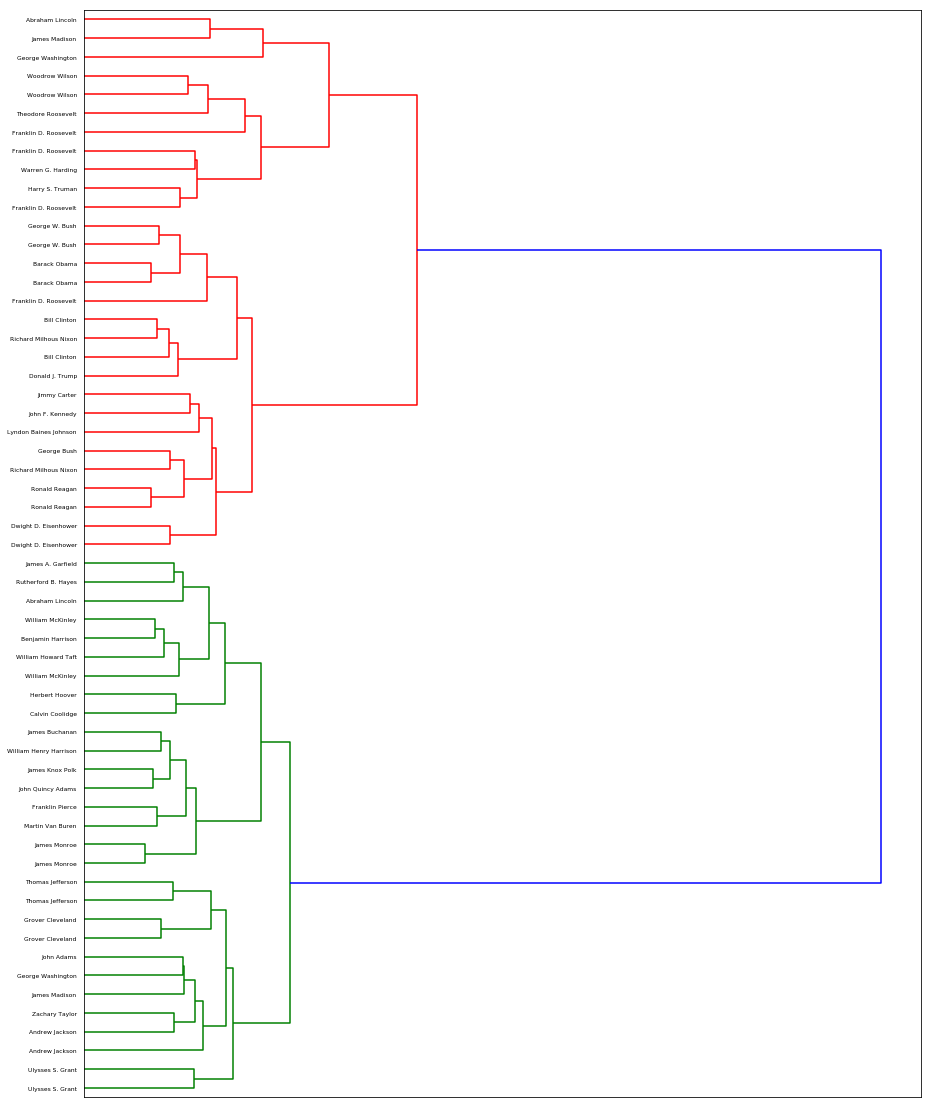

In [30]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=df_speeches.values[:,1]);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

#plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.show()